## Proyecto Ciencia de datos en Python
#### Ruben Gonzalez 20003314

In [1]:
import numpy as np
import seaborn as sns

In [2]:
data = np.load("proyecto_training_data.npy")

In [350]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [351]:
#Se utiliza Pandas para una mejor comprension de los datos
pandas_dataframe = pd.DataFrame(data,columns=['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])

In [5]:
pandas_dataframe

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [6]:
dimensiones=pandas_dataframe.shape

In [7]:
longitud=int(dimensiones[0]*0.8)
trainingdata=pandas_dataframe[:longitud]

In [8]:
trainingdata

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1163,108959.0,4.0,1258.0,6.0,1969.0,60.0
1164,194000.0,5.0,1432.0,5.0,1978.0,NaN
1165,233170.0,7.0,1502.0,7.0,2009.0,79.0
1166,245350.0,8.0,1694.0,7.0,2008.0,64.0


In [9]:
validationdata=pandas_dataframe[longitud:int(dimensiones[0])]
validationdata

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
1168,235000.0,6.0,1236.0,7.0,1935.0,120.0
1169,625000.0,10.0,1831.0,10.0,1995.0,118.0
1170,171000.0,6.0,1118.0,6.0,1977.0,76.0
1171,163000.0,6.0,1261.0,6.0,1958.0,76.0
1172,171900.0,7.0,625.0,5.0,2006.0,35.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [10]:
trainingdata.describe() #Muestra las estadisticas de cada una de las variables

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,962.000000
mean,180590.277397,6.101027,1156.323630,6.485445,1971.451199,69.946985
std,78815.697902,1.378025,373.780374,1.609141,29.951707,23.478161
min,34900.000000,1.000000,334.000000,2.000000,1875.000000,21.000000
25%,129900.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,162950.000000,6.000000,1086.000000,6.000000,1973.000000,70.000000
75%,214000.000000,7.000000,1390.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,3228.000000,14.000000,2010.000000,313.000000


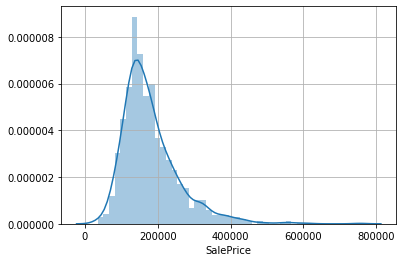

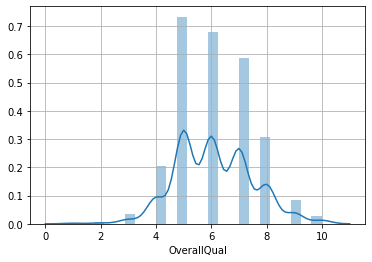

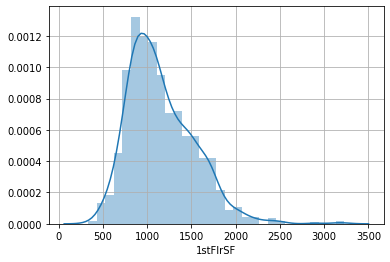

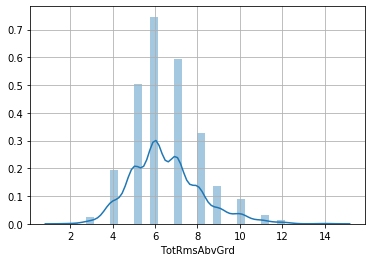

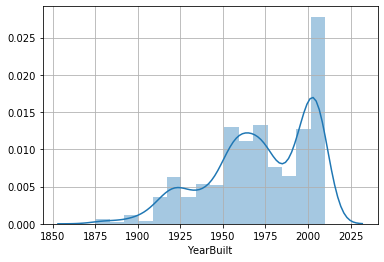

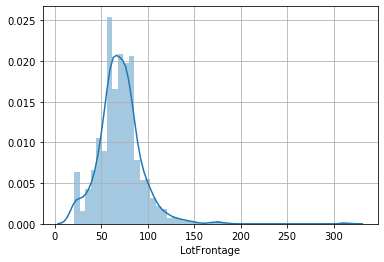

In [11]:
#Graficacion de histogramas de cada variable
for i in trainingdata.columns:
    fig=plt.figure()
    ax=fig.add_subplot(sns.distplot(trainingdata[i]))
    ax.grid()
    plt.show()

#### Calculo del coeficiente de correlacion entre x e y

In [12]:
correlaciones=trainingdata.corr()
correlaciones

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
SalePrice,1.000000,0.793990,0.616289,0.564707,0.534171,0.363292
OverallQual,0.793990,1.000000,0.469411,0.444293,0.567313,0.242420
1stFlrSF,0.616289,0.469411,1.000000,0.409318,0.292074,0.417388
TotRmsAbvGrd,0.564707,0.444293,0.409318,1.000000,0.122911,0.341005
YearBuilt,0.534171,0.567313,0.292074,0.122911,1.000000,0.121474
LotFrontage,0.363292,0.242420,0.417388,0.341005,0.121474,1.000000


Text(0.5, 0.98, 'Correlaciones entre variables')

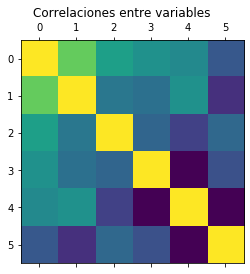

In [13]:
plt.matshow(trainingdata.corr())
plt.suptitle("Correlaciones entre variables")

In [14]:
correlaciones["SalePrice"]
trainingdata.columns[0]

'SalePrice'

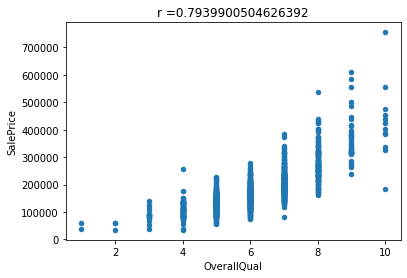

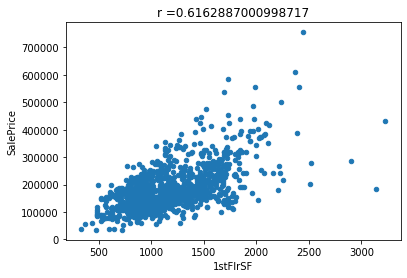

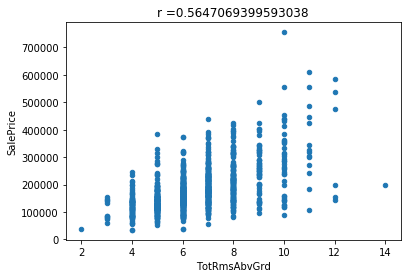

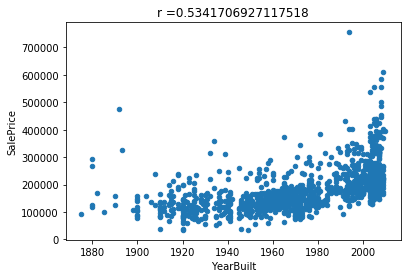

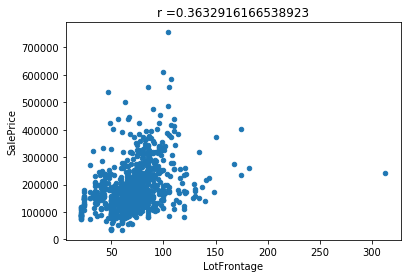

In [15]:
for i in range(1,trainingdata.columns.size):
    trainingdata.plot.scatter(x=trainingdata.columns[i],y='SalePrice',title='r ='+str(correlaciones[trainingdata.columns[i]]['SalePrice']))

Basado en los resultados anteriores, las variables con mayor potencial predictivo son:
* OverallQual	
* 1stFlrSF

Para trabajar con valores no tan altos con respecto a los precios de venta se procedera a realizarle un tratamiento especial a precio de venta dividiendolo sobre su media:

In [22]:
mediaventas = trainingdata['SalePrice'].mean()
trainingdata["SalePriceModified"] = trainingdata["SalePrice"] / mediaventas
trainingdata

C:\Users\ruben\AppData\Local\Continuum\anaconda3\envs\Galileo-Python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage,SalePriceModified
0,208500.0,7.0,856.0,8.0,2003.0,65.0,1.154547
1,181500.0,6.0,1262.0,6.0,1976.0,80.0,1.005037
2,223500.0,7.0,920.0,6.0,2001.0,68.0,1.237608
3,140000.0,7.0,961.0,7.0,1915.0,60.0,0.775236
4,250000.0,8.0,1145.0,9.0,2000.0,84.0,1.384349
...,...,...,...,...,...,...,...
1163,108959.0,4.0,1258.0,6.0,1969.0,60.0,0.603349
1164,194000.0,5.0,1432.0,5.0,1978.0,NaN,1.074255
1165,233170.0,7.0,1502.0,7.0,2009.0,79.0,1.291155
1166,245350.0,8.0,1694.0,7.0,2008.0,64.0,1.358600


### Funcion para entrenar un modelo de regresion lineal

In [259]:
def fentrena(x,y,epochs,imprimir_error_cada,lr):
    #crear matriz para calculos sobre x
    unos=np.ones(x.size)
    matrizx=pd.DataFrame()
    matrizx['x']=pd.Series(x)
    matrizx['unos']=pd.Series(unos)
    xfinal=np.array(matrizx)
    yfinal=np.array(y)
    derror=np.empty(epochs)
    dmodelo=np.empty((epochs,2))
    
    #Se inicializan los valores m,b en un vector
    mb=np.array([1,1])
    
    for i in range(0,epochs): 
        #Calculo de yhat
        yhat=xfinal.dot(mb)
    
        #Calculo del error
        derror[i]=np.mean(np.power(yfinal-yhat,2))*0.5
    
        #Calculo de gradientes
        gradiente=np.array([np.mean((yhat-yfinal)*xfinal[:,0]),np.mean((yhat-yfinal)*xfinal[:,1])])
    
        #Actualizar mb
        dmodelo[i]=mb
        mb=mb-(lr*gradiente)
        
        
        if (i % imprimir_error_cada == 0 and i!=0):
            print(str(i)+' '+str(derror[i]))
    
    return derror,dmodelo


In [336]:
derroresOverallQual,dmodeloOverallQual= fentrena(trainingdata['OverallQual'],trainingdata['SalePrice'],125,16,0.0007)

16 8642118389.599543
32 4310259838.358747
48 2567217351.3385262
64 1865762832.8544123
80 1583382410.6533854
96 1469613000.2098048
112 1423682940.7278514


In [337]:
def graficarerror(derrores):
    x = np.arange(0,derrores.size)
    fig = plt.figure()
    ax = fig.add_subplot() 

    ax.grid()
    ax.plot(x,derrores)

    ax.set_xlabel('iteracion')
    ax.set_ylabel('error')
    ax.set_title('Grafica de error')

    return plt.show()

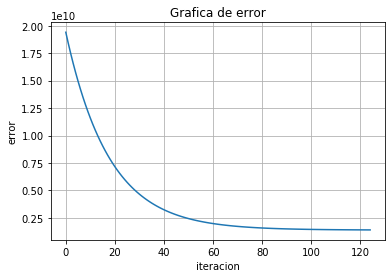

In [338]:
graficarerror(derroresOverallQual)

In [339]:
derrores1stFlrSF,dmodelo1stFlrSF= fentrena(trainingdata['1stFlrSF'],trainingdata['SalePrice'],100,16,0.00000003)

16 6006393158.9205065
32 2915384608.3795576
48 2190304017.1156244
64 2020216531.9554226
80 1980317857.749883
96 1970958529.5495188


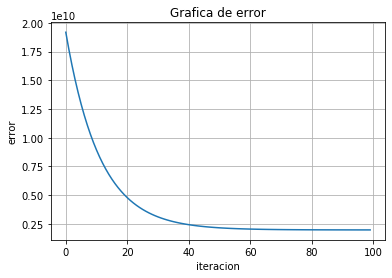

In [340]:
graficarerror(derrores1stFlrSF)

In [346]:
def graficarmodelo(x,y,dmodelo,n):
    #Obtener el ultimo m y b pues es el mas certero
    xfinal=np.array(x)
    yfinal=np.array(y)
    
    #Obtener y de la recta a partir de mb y el x proporcionado
    for i in range(0,dmodelo.shape[0]-1,n):
        fig = plt.figure()
        ax = fig.add_subplot() 
        ax.grid()
        ax.plot(xfinal,yfinal,'ro',color='orange')
        
        yrecta=(dmodelo[i,0]*xfinal)+dmodelo[i,1]
        ax.plot(xfinal,yrecta)
        ax.set_xlabel(x.name)
        ax.set_ylabel('SalesPrice')
        ax.set_title('iteracion'+str(i+1))
    return plt.show()

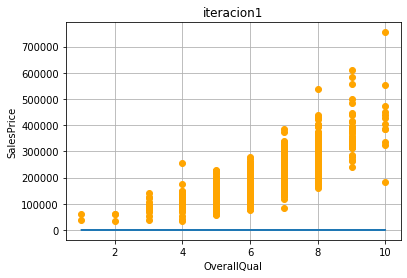

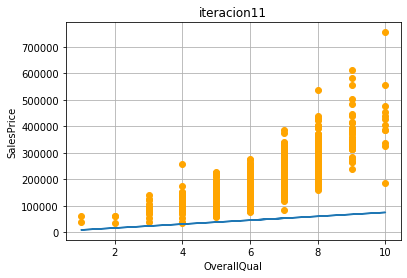

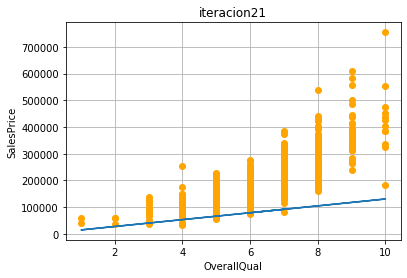

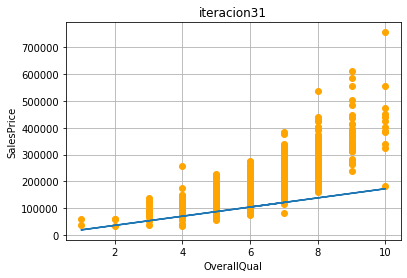

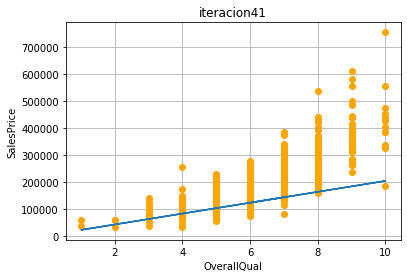

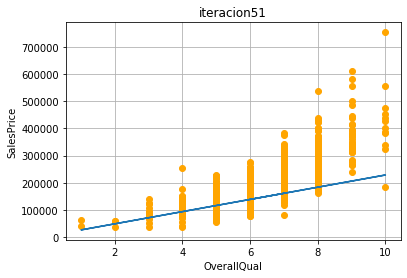

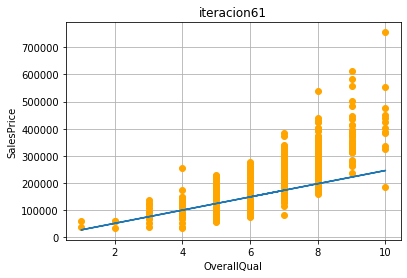

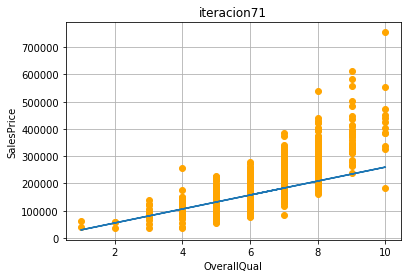

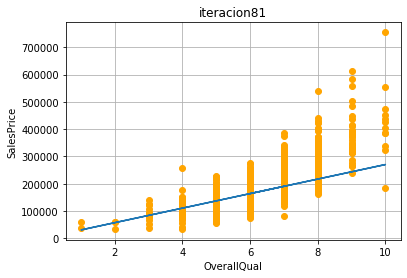

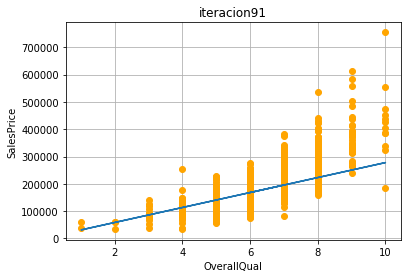

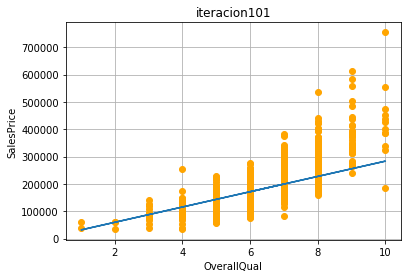

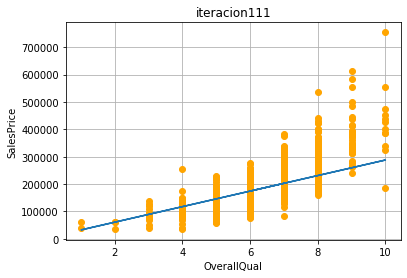

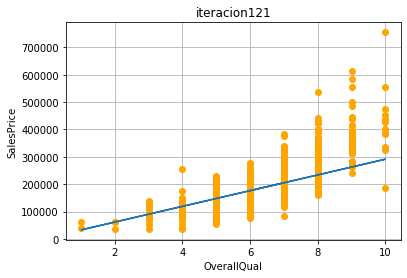

In [347]:
graficarmodelo(trainingdata['OverallQual'],trainingdata['SalePrice'],dmodeloOverallQual,10)


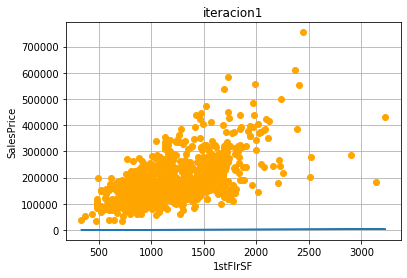

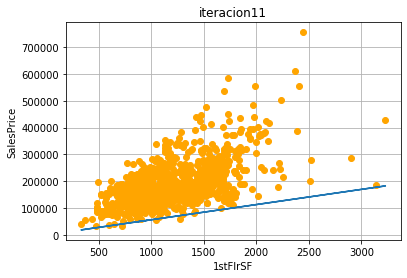

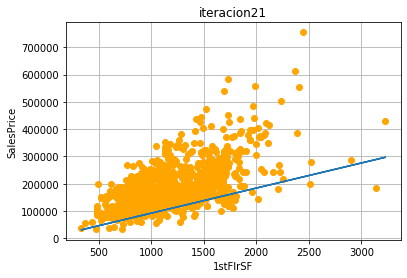

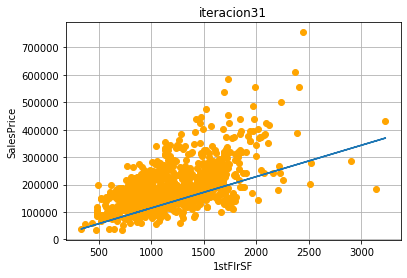

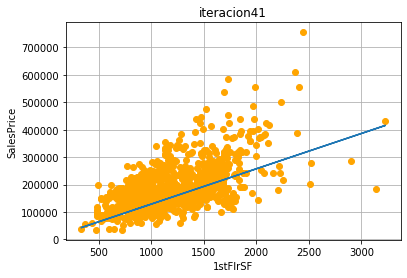

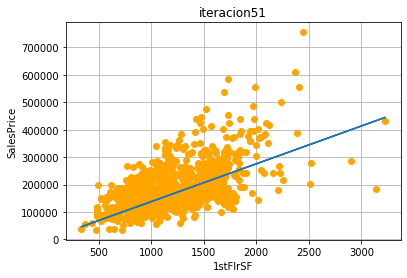

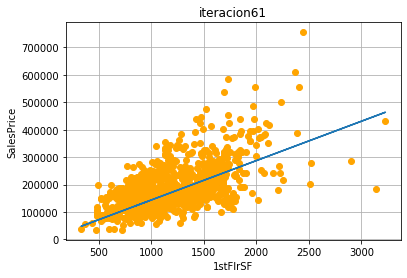

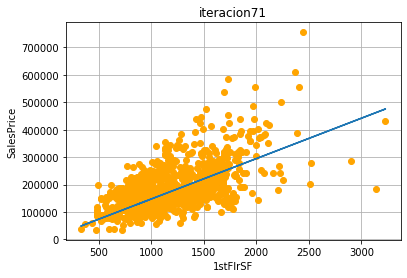

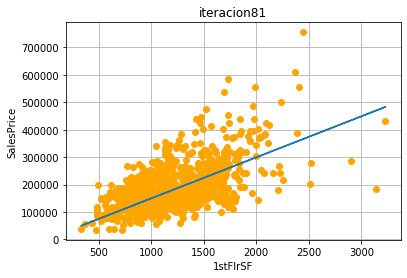

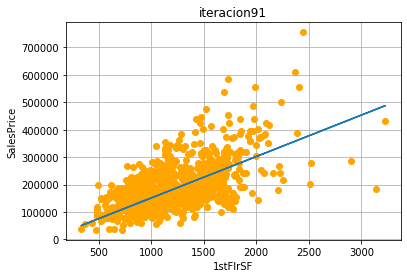

In [348]:
graficarmodelo(trainingdata['1stFlrSF'],trainingdata['SalePrice'],dmodelo1stFlrSF,10)

### Entrenamiento usando sckit-learn

In [352]:
skit_OverallQual=LinearRegression().fit(trainingdata['OverallQual'],trainingdata['SalePrice'])

ValueError: Expected 2D array, got 1D array instead:
array=[7. 6. 7. ... 7. 8. 6.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.